In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Reading the Dataset

df = pd.read_csv("INFY.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [3]:
df.tail(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5194,2020-11-14,INFY,EQ,1124.20,1137.00,1139.65,1131.10,1134.00,1133.45,1134.22,1136144,1.288641e+14,41663.0,446947.0,0.3934
5195,2020-11-17,INFY,EQ,1133.45,1144.75,1145.00,1112.65,1125.25,1123.70,1122.20,12813968,1.437984e+15,190186.0,7463366.0,0.5824
5196,2020-11-18,INFY,EQ,1123.70,1128.50,1132.70,1101.45,1111.25,1110.55,1111.01,9839468,1.093177e+15,168106.0,6252183.0,0.6354
5197,2020-11-19,INFY,EQ,1110.55,1100.00,1114.70,1093.80,1097.00,1096.75,1102.13,10092343,1.112311e+15,179639.0,5447953.0,0.5398
5198,2020-11-20,INFY,EQ,1096.75,1106.00,1109.00,1091.10,1104.45,1103.35,1101.92,8063554,8.885377e+14,199981.0,4002454.0,0.4964
5199,2020-11-23,INFY,EQ,1103.35,1105.00,1144.80,1101.95,1138.50,1139.85,1128.46,10546363,1.190116e+15,200221.0,4951543.0,0.4695
5200,2020-11-24,INFY,EQ,1139.85,1145.00,1154.90,1133.35,1140.15,1140.05,1142.60,8515426,9.729744e+14,175511.0,2742945.0,0.3221
5201,2020-11-25,INFY,EQ,1140.05,1137.00,1143.50,1111.25,1118.80,1115.65,1124.52,8958701,1.007422e+15,220995.0,5048132.0,0.5635
5202,2020-11-26,INFY,EQ,1115.65,1119.95,1119.95,1098.30,1118.00,1113.20,1105.60,10962256,1.211990e+15,207324.0,5794530.0,0.5286
5203,2020-11-27,INFY,EQ,1113.20,1118.00,1121.00,1091.00,1112.35,1100.00,1103.85,25306145,2.793428e+15,238942.0,18969986.0,0.7496


In [4]:
df.shape

(5204, 15)

Text(0, 0.5, 'Share Price')

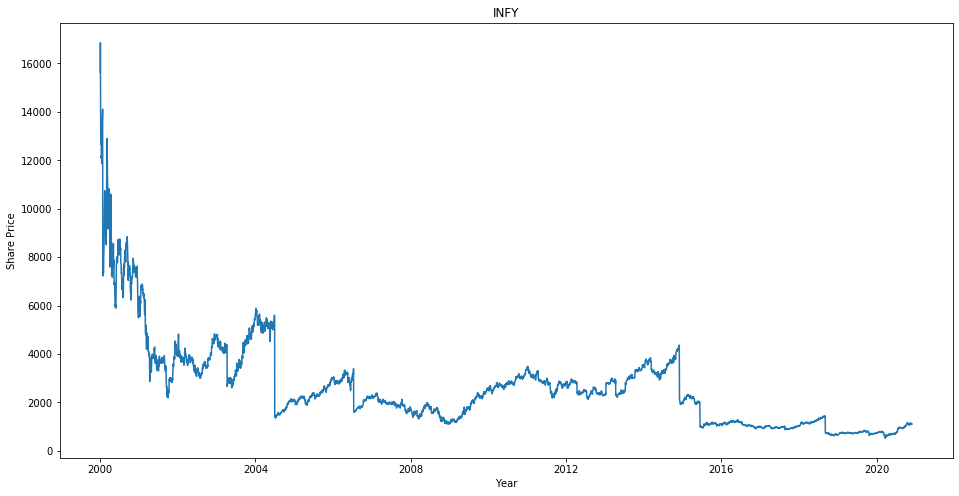

In [5]:
#Analyzing Closing Price

df["Date"] = pd.to_datetime(df.Date, format = "%Y-%m-%d")
df.index = df['Date']
plt.figure(figsize = (16, 8))
plt.plot(df["Close"], label = 'Closing Price History')
plt.title('INFY')
plt.xlabel("Year")
plt.ylabel("Share Price")

In [6]:
#Creating Dataframe
data = df.sort_index(ascending = True, axis = 0)
new_data = pd.DataFrame(index = range(0, len(df)), columns = ['Date', 'Close'])
for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#Setting Index
new_data.index = new_data.Date
new_data.drop('Date', axis = 1, inplace = True)

#Creating Train and Test Sets
dataset = new_data.values
train = dataset[0:3500,:]
valid = dataset[3500:,:]

#Converting Dataset into x_train and y_train
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Fitting the LSTM Network
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(units = 50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs = 1, batch_size = 1, verbose = 2)

#Predicting 246 Values, Using Past 60 Datas from the Train Data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

3440/3440 - 116s - loss: 4.2703e-04


In [7]:
#Calculating Root Mean Square

rms = np.sqrt(np.mean(np.power((valid-closing_price), 2)))
rms

259.89004307426615

C:\Users\swarn\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'Share Price')

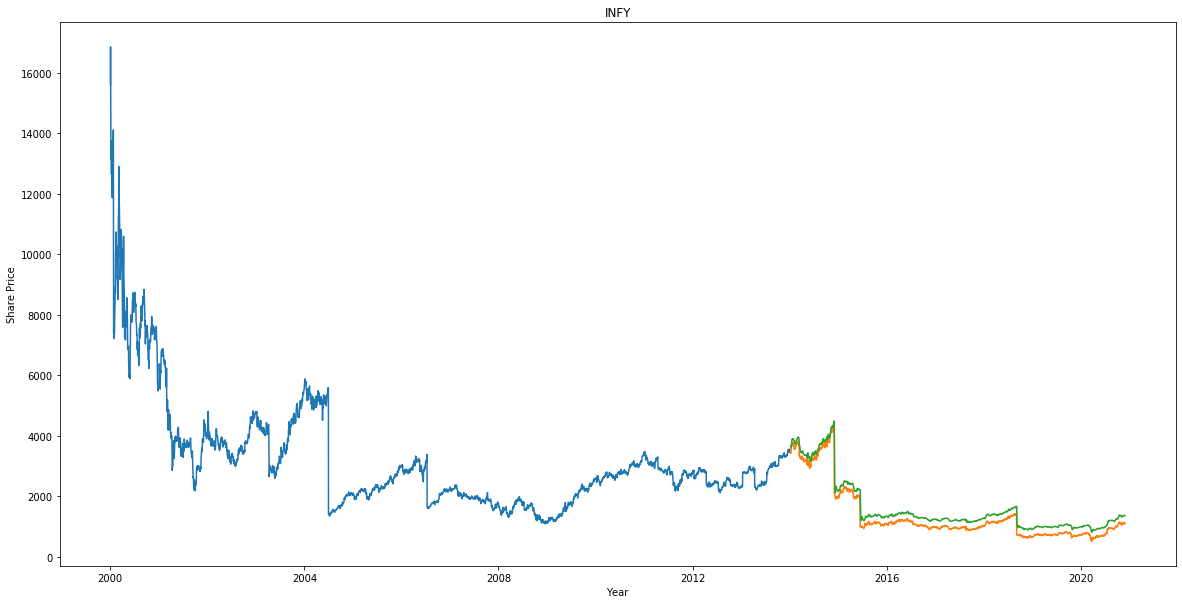

In [8]:
#Plotting the Predictions

train = new_data[:3500]
valid = new_data[3500:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.title('INFY')
plt.xlabel("Year")
plt.ylabel("Share Price")

In [9]:
#Saving the Model

model.save("infymodel.h5")

# Creating a Global Function

Now in this step, we will embed all this functionality into a single function, which will give results into a plotted graph by just passing the dataset of any company.

In [10]:
def share_predictor(df):
    df["Date"] = pd.to_datetime(df.Date, format = "%Y-%m-%d")
    df.index = df['Date']
    #Creating Dataframe
    data = df.sort_index(ascending = True, axis = 0)
    new_data = pd.DataFrame(index = range(0, len(df)), columns = ['Date', 'Close'])
    for i in range(0, len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]

    #Setting Index
    new_data.index = new_data.Date
    new_data.drop('Date', axis = 1, inplace = True)

    #Creating Train and Test Sets
    dataset = new_data.values
    train = dataset[0:3500,:]
    valid = dataset[3500:,:]

    #Converting Dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(60, len(train)):
        x_train.append(scaled_data[i-60:i, 0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    #Fitting the LSTM Network
    model = Sequential()
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    model.add(LSTM(units = 50))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    model.fit(x_train, y_train, epochs = 1, batch_size = 1, verbose = 2)

    #Predicting 246 Values, Using Past 60 Datas from the Train Data
    inputs = new_data[len(new_data) - len(valid) - 60:].values
    inputs = inputs.reshape(-1, 1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(60, inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    #Plotting the Predictions
    train = new_data[:3500]
    valid = new_data[3500:]
    valid['Predictions'] = closing_price
    
    return train, valid

3440/3440 - 105s - loss: 0.0022


C:\Users\swarn\anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'Year')

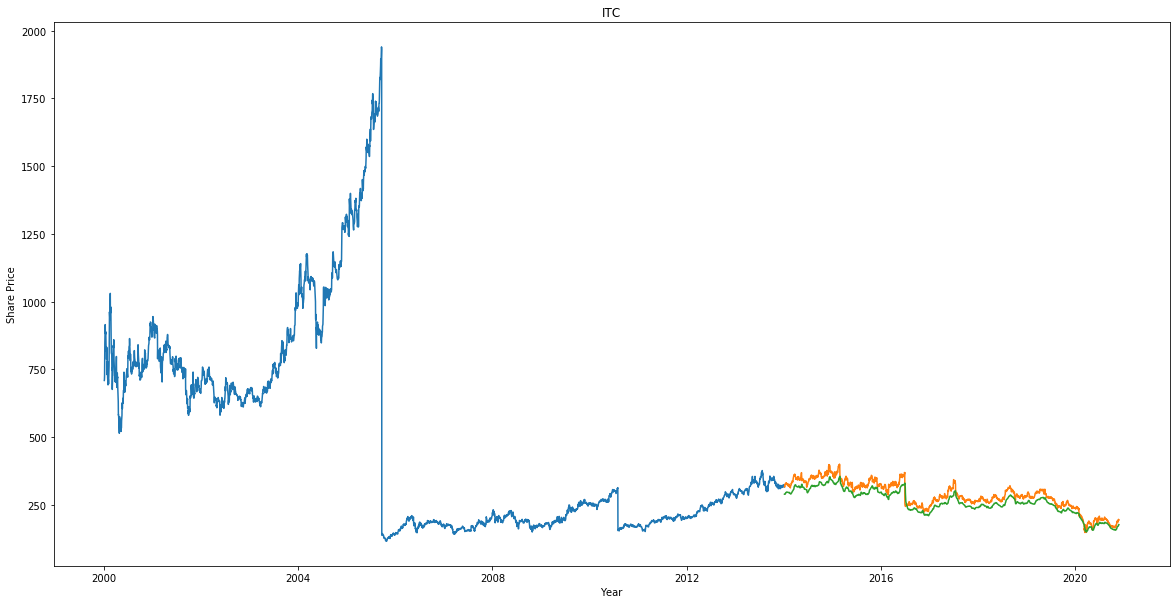

In [11]:
#Implementing the function

df = pd.read_csv("ITC.csv")
company_name = 'ITC'

tr, vd = share_predictor(df)
plt.plot(tr['Close'])
plt.plot(vd[['Close','Predictions']])
plt.title(company_name)
plt.ylabel("Share Price")
plt.xlabel("Year")

3440/3440 - 97s - loss: 0.0011


C:\Users\swarn\anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'Year')

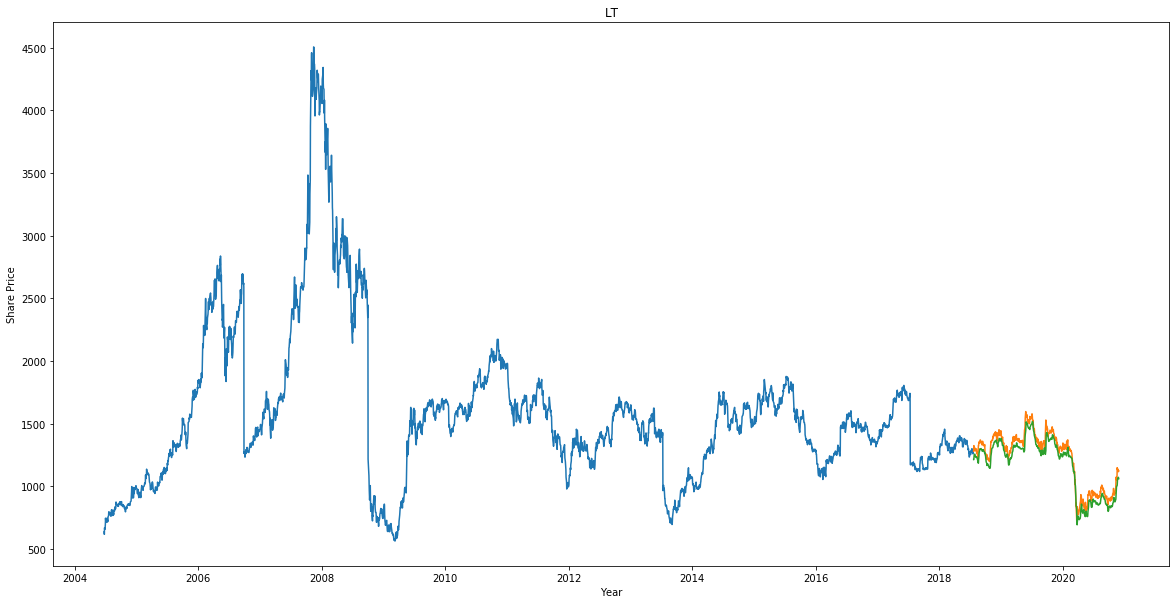

In [12]:
df = pd.read_csv("LT.csv")
company_name = 'LT'

tr, vd = share_predictor(df)
plt.plot(tr['Close'])
plt.plot(vd[['Close','Predictions']])
plt.title(company_name)
plt.ylabel("Share Price")
plt.xlabel("Year")

3440/3440 - 87s - loss: 0.0014


C:\Users\swarn\anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'Year')

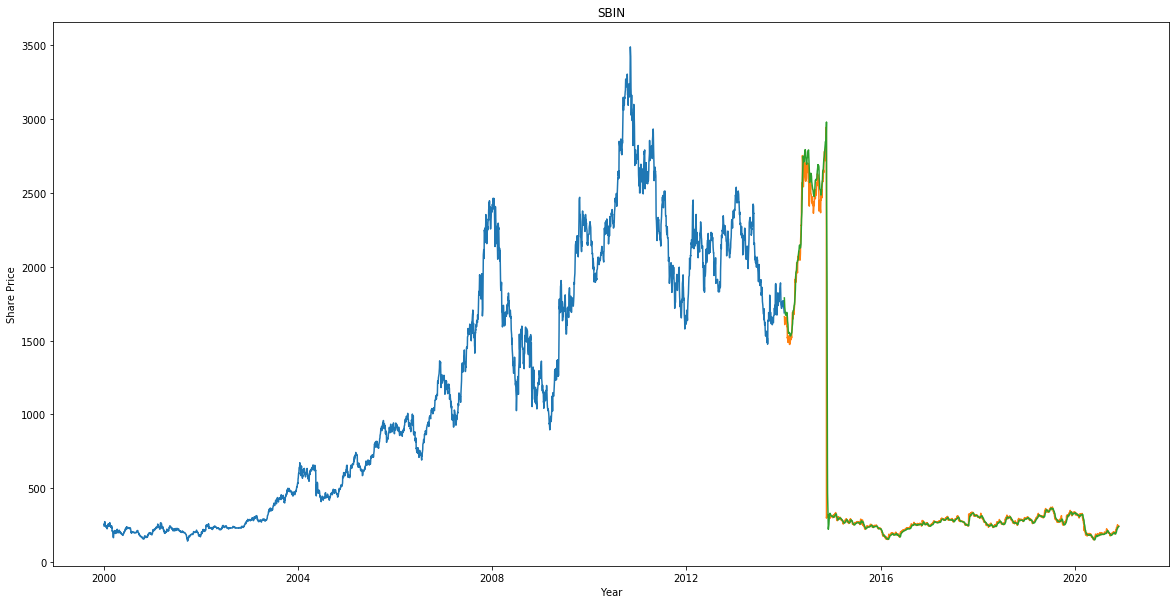

In [13]:
df = pd.read_csv("SBIN.csv")
company_name = 'SBIN'

tr, vd = share_predictor(df)
plt.plot(tr['Close'])
plt.plot(vd[['Close','Predictions']])
plt.title(company_name)
plt.ylabel("Share Price")
plt.xlabel("Year")

3440/3440 - 93s - loss: 0.0023


C:\Users\swarn\anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'Year')

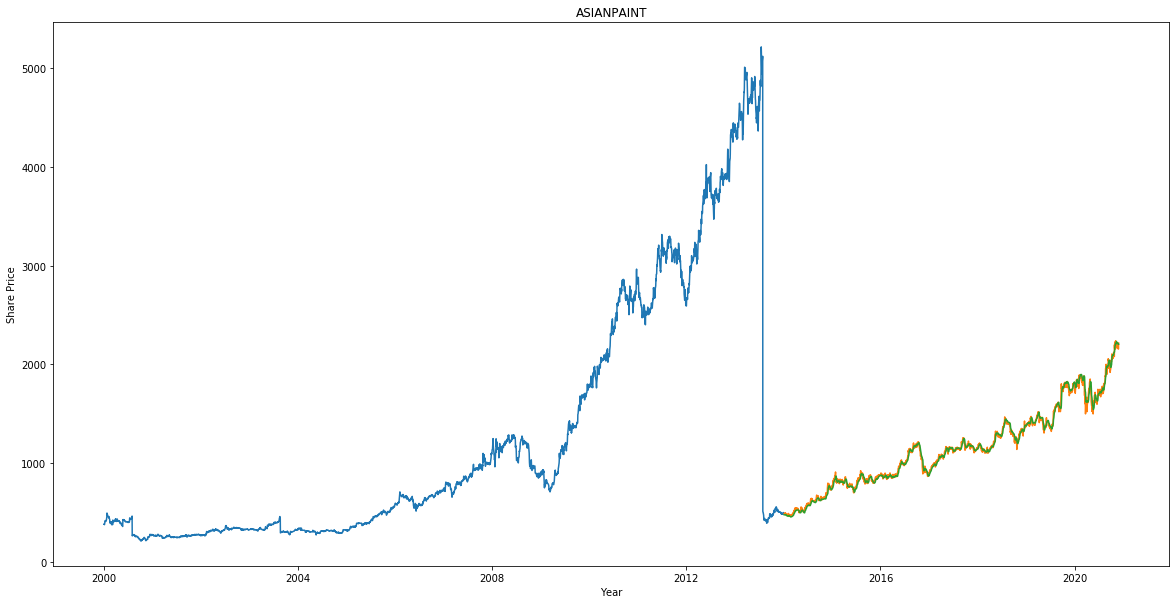

In [14]:
df = pd.read_csv("ASIANPAINT.csv")
company_name = 'ASIANPAINT'

tr, vd = share_predictor(df)
plt.plot(tr['Close'])
plt.plot(vd[['Close','Predictions']])
plt.title(company_name)
plt.ylabel("Share Price")
plt.xlabel("Year")